## MTH 9879 Market Microstructure Models, Spring 2019

<p>

### Lecture 8: Market impact of metaorders and price manipulation

<p>

<p>
Jim Gatheral   
Department of Mathematics   
  
  
<h3><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "center" width=500></h3>


$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\cL}{\mathcal{L} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\cC}{\mathcal{C} }
\newcommand{\Xv}{X^{(v)}}
\newcommand{\s}{\mathcal{S} }
\newcommand{\cE}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$

## Outline of Lecture 8

-   Market impact of meta orders

    -   The FGLW model

    -   The Bouchaud propagator model
    
    - The LLOB model


-   Empirical analysis of the market impact of metaorders


-   No price manipulation and allowable models



### What is a market impact model?

-   Traders need a model to estimate the expected costs of executing a
    trade.


-   If the only possible order type were VWAP, all we would need is a
    large database of VWAP executions which we could interpolate along
    various dimensions to estimate the cost of any given new trade.

-   In practice we also want to be able to estimate the cost of
    executing with other strategies.

    -   For that we need a dynamical model of the underlying.

    -   That is, we need a model of how the stock price evolves during
        execution.

### Common algorithms

-   VWAP “Volume weighted average price”

    -   Trades at constant rate in volume time

    -   Variants of VWAP are still the most popular algos.


-   POV “Percentage of volume”

    -   Another variant of VWAP

-   TWAP “Time weighted average price”

    -   Trades at constant rate in wall clock time


-   IS “Implementation shortfall”

    -   Trades faster at the beginning and more slowly at the end

    -   The idea is to balance the risk of a worse price (which is
        proportional to quantity remaining) against the benefit of
        better execution from being more patient.

### Terminology

-   By <span>*metaorder*</span>, we mean an order that is sufficiently
    large that it cannot be filled immediately without eating into the
    order book.

    -   Nowadays, this means just about any order.

    -   Such orders need to be split.


-   We refer to each component of a metaorder as a <span>*child
    order*</span>.

-   By the <span>*metaorder impact profile*</span> (or just
    <span>*impact profile*</span>), we mean the average path of the
    stock price during and after execution of a metaorder.


-   <span>*Completion*</span> refers to the timestamp of the last child
    order of a metaorder.

### Schematic of the metaorder impact profile

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/ShapiroPlot.png" align = "center" width=800></h2>
Figure 1: The metaorder impact profile


### The impact profile

-   When a buy metaorder of length $T$ is sent, its immediate effect is
    to move the price upwards (to $S_T$ say).


-   After completion, the price reverts to some price $S_{\infty}$
    (which may be the starting price $S_0$).


-   Market impact then has two components, one transient and one
    permanent.


-   Knowledge of the metaorder impact profile is key to the derivation
    of optimal execution strategies.



### The FGLW market impact model

In the model of [Farmer, Gerig, Lillo, and Waelbroeck]<sup id="cite_ref-FGLW" class="reference"><a href="#cite_note-FGLW"><span>[</span>7<span>]</span></a></sup> (FGLW from now on), there is a market maker
$\mathcal{M} $, a representative informed trader $\mathcal{I} $ and uninformed (or
noise) traders $\mathcal{U} $. Informed trader trades using metaorder, for simplicity, we assume he submits one lot of orders, say one share, a time. We will be considering the problem from $\mathcal M$'s perspective.

- Let $N$ be the (random) size of $\mathcal{I}$'s metaorder, where $N \in \{0, \cdots, M\}$ for some large constant $M$. $N$ is unknown to $\mathcal{M}$.

- Let $\tilde{S_t}$ denote the transacted price at time $t$. 

- At any point in time $t$, if the metaorder continues, the transacted price goes up by $R_t^+$; otherwise it reverts back by $R_t^-$. Both $R_t^+$ and $R_t^-$ are assumed determinstic functions of $t$.

- The transacted price fluctuates by $\eta_t$ due to the noisy trading, assumed zero mean iid. 

- The goal is to determine $R_t^+$, $R_t^-$ for all $1 \leq t \leq M-1$, and the expected  impact profile $\Eof{\tilde S_t|N} - S_0$ for $t \leq N + 1$.




The evolution of the transacted price $\tilde{S}_t$, $0 \leq t \leq M-1$ is given by 

$$
\tilde{S}_{t+1} = \tilde{S}_t + R_t^+ \1_{\{t < N\}} - R_t^- \1_{\{t = N, N \geq t\}} + \eta_{t+1}.
$$

with $R_0^- = 0$.

Note that 
- If $N=0$, then $\tilde{S}_t = \tilde{S}_{t-1} + \eta_t$ for $t = 1, \cdots, M$. Thus, the transacted price follows a random walk. 
- For $N+1 \leq t \leq M$, 
$$
\tilde{S}_{t+1} = \tilde{S}_t + \eta_{t+1} = \tilde{S}_{N+1} + \sum_{\tau=N+2}^t \eta_\tau
$$
In other words, the transacted price evolves again like a random walk when $\mathcal{I}$'s metaorder finishes. 

### Expected transacted price path in the FGLW model 

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2019/03/FGLW-Fig1.png" align = "center" width=800></h2>

The authors show that the typical impact profile associated with the
execution of a metaorder may be recovered from two assumptions:

-   <span>**The Martingale Condition**</span>: The <font color=blue>transacted</font> price process $\tilde{S}_t$ is a
    martingale.

    -   $\mathcal{M} $ does not know how long a given metaorder will
        continue, i.e., $N$ is unknow to $\mathcal{M}$.

-   <span>**The Fair Pricing Condition**</span>: On average, the price
    reverts after completion of the metaorder to a level equal to the
    average price paid by $\mathcal{I} $.

    -   If metaorder sizes are power-law distributed with exponent
        $\beta$, the price reverts on average to a level which is a
        factor $1/\beta$ of the peak price reached at completion.

### The Martingale Condition

For $t \geq 0$, assuming martingality of $\tilde{S}_t$ from $\mathcal M$'s point of view it follows that

\begin{eqnarray*}
\tilde S_t = \E_t[\tilde{S}_{t+1}] &=& \tilde{S}_t + \E_t[R_t^+ \1_{\{t < N\}}] - \E_t[R_t^- \1_{\{t = N, N \geq t\}}] + \E_t[\eta_{t+1}] \\
&=& \tilde{S}_t + R_t^+ \, \PP_t[ t < N ] - R_t^- \, \PP_t[t = N, N \geq t].
\end{eqnarray*}

Thus, $R_t^+$ and $R_t^-$ satisfy the martingale condition

<a name="eq:MartingaleCondition"></a>(1)
$$
\frac{R_t^+}{R_t^-} = \frac{\PP_t[t = N, N \geq t]}{\PP_t[ t < N ]} = \frac{\frac{\PP_t[t = N, N \geq t]}{\PP_t[N \geq t]}}{\frac{\PP_t[ N \geq t + 1 ]}{\PP_t[N \geq t]}} = \frac{1 - \mathcal P_t}{\mathcal P_t},
$$

where $\mathcal P_t = \PP[N \geq t + 1|N \geq t]$ is the (conditional) probability of the continuation of $\mathcal I$'s metaorder at time $t$.



### The Fair Pricing Condition

The fair pricing condition reads, for $N > 0$,

\begin{eqnarray*}
\Eof{\left.\frac1N \sum_{t=1}^N \tilde{S}_t\right|N} = \Eof{\tilde{S}_{N+1}|N}.
\end{eqnarray*}

In other words, conditioned on the size $N$ of $\mathcal I$'s metaorder, the average traded price during transaction equals the reverted price after the completion of metaorder. 

- FGLW show that in the limit where the number of informed traders $\mathcal{K} \to \infty$, any Nash equilibrium must satisfy the Fair Pricing condition.

Conditioned on $N$, we have on the one hand the average price along the trajectory

\begin{eqnarray*}
\frac1N \sum_{t=1}^N \tilde{S}_t &=& S_0 + \frac 1N\sum_{t=1}^N \sum_{s=0}^{t-1} R_s^+ + \frac1N \sum_{t=1}^N \sum_{s=0}^{t-1} \eta_{s+1}, 
\end{eqnarray*}

On the other hand, 

$$
\tilde{S}_{N+1} = S_0 + \sum_{t=0}^{N-1} R_t^+ - R_N^- + \sum_{t=1}^{N+1} \eta_t.
$$

Thus, the fair pricing condition implies 

\begin{eqnarray*}
&& S_0 + \frac 1N\sum_{t=1}^N \sum_{s=0}^{t-1} R_s^+ \\
&=& \Eof{\left. S_0 + \frac 1N\sum_{t=1}^N \sum_{s=0}^{t-1} R_s^+ + \frac1N \sum_{s < t} \eta_{s+1} \right|N} \\ 
&=& \Eof{\left. S_0 + \sum_{t=0}^{N-1} R_t^+ - R_N^- + \sum_{t=1}^{N+1} \eta_t\right|N} \\
&=& S_0 + \sum_{t=0}^{N-1} R_t^+ - R_N^-.
\end{eqnarray*}

We obtain

<a name="eq:FairPricingCondition"></a>(2)
$$
R_N^- = \sum_{t=0}^{N-1} R_t^+ - \frac1N \sum_{t=1}^N \sum_{s=0}^{t-1} R_s^+ = \frac1N \sum_{s=1}^{N-1} s R_s^+ .
$$

#### Note
- $R_1^- = 0$. In other words, if the metaorder is of size 1, then there is no price reversion at time $t=2$. 

### Solving for $R_t^+$ and $R_t^-$

- Putting together, the Martingale Condition [(1)](#eq:MartingaleCondition) and the Fair Pricing [(2)](#eq:FairPricingCondition)
    Condition define a system of linear equations for $R_t^+$ and $R_t^-$.

- The solution is given by

    \begin{eqnarray*}
        && R_t^+ = \frac1t \frac{p_t}{\Pof{N \geq t+1}} \frac{1 - p_1}{\Pof{N \geq t}} R_1^+, \quad \mbox{ for } 2 \leq t \leq M - 1;\\
        && R_t^- = \frac{\mathcal P_t}{1 - \mathcal P_t} R_t^+, \quad \mbox{ for } 1 \leq t \leq M - 1
    \end{eqnarray*}

    where $p_n = \Pof{N = n}$ is the (unconditional) probability of the metaorder size. We are left with two undetermined constants to choose: $R_0^+$ and $R_1^+$.


- $R_0^+$ and $R_1^+$ are exogenous; it sets the scale of market impact.

### Setting the scale

The undetermined constants $R_0^+$ and $R_1^+$ are set to incorporate $\mathcal I$'s signal $\alpha$ as

\begin{eqnarray*}
&& R_0^+ = \int_0^{\alpha_1} \alpha p(\alpha) d\alpha, \\
&& R_0^+ + \frac{\mathcal P_1}{1 - \mathcal P_1} R_1^+ = \int_{\alpha_1}^{\alpha_2} \alpha p(\alpha) d\alpha
\end{eqnarray*}

where $p(\alpha)$ is the pdf for $\alpha$. In words, information signal in the range $
\alpha \in [0, \alpha_1]$ will be assigned to metaorder of size one; signals in the range $\alpha \in (\alpha_1, \alpha_2]$ will be assigned of size two. 

### Impact profile in the FGLW model

Thus, the impact profile $\Eof{\tilde S_t|N} - S_0$ and the reversion level $\Eof{\tilde{S}_{N+1}|N} - S_0$ for each $N$ and $1 \leq t \leq N \leq M$ are given respectively by

\begin{eqnarray*}
&& \Eof{\tilde S_t|N} - S_0 = \sum_{s=0}^{t-1} R_s^+ = R_0^+ + R_1^+ \left\{ 1 + \sum_{s=2}^{t-1} \frac{(1 - p_1) p_s}{s \, \Pof{N \geq s + 1} \, \Pof{N \geq s}} \right\},  \\
&& \Eof{\tilde S_{N+1}|N=n} - S_0 = \sum_{s=0}^n R_s^+ - R_n^- \\
&& \qquad = R_0^+ + R_1^+ \left\{ 1 + \sum_{s=2}^{n-1} \frac{(1 - p_1) p_s}{s \, \Pof{N \geq s + 1} \, \Pof{N \geq s}} - \frac{1 - p_1}{n \Pof{N \geq n}} \right\}.
\end{eqnarray*}


#### Note 
-   It follows that the Fair Pricing and Martingale conditions cannot
    both hold for each order size individually but only on average over
    all order sizes.

    -   $\mathcal{M} $ always loses money on orders of size $M$ and
        makes money on orders of size 1.


### Power-law distribution of metaorder sizes

-   If the order-size distribution is power-law, the longer a metaorder
    has been active, the more likely it is to continue.

    -   This holds more generally if the tail of the order size
        distribution is fatter than exponential,

-   To see this, suppose there have been $t$ slices already observed.
    Let $N$ denote the overall size (number of child orders) of the
    metaorder. Then, assuming a power-law distribution of order size $N$
    with tail exponent $\beta$,

    \begin{eqnarray*}
    \mathcal P_t &=& \Pof{N \geq t+1|N \geq t} = \frac{\Pof{N \geq t+1}}{\Pof{N \ge t}} \sim \left(\frac{t}{t+1}\right)^\beta
    \end{eqnarray*}

    which increases with $t$.

    -   Recall the stylized fact that $\beta \approx 3/2$!

### FGLW impact profile in the power-law case

For simplicity assume the distribution of the size $N$ of $\mathcal I$'s metaorder is given by the Pareto distribution 
$$
p_n = \frac1{\zeta(\beta) \; n^{\beta+1}},
$$
for $n \geq 1$. Since in this case

$$
R_t^+ \sim \frac1{t^{2-\beta}},
$$

the impact profile $\Eof{\tilde S_t|N} - S_0$ becomes

\begin{eqnarray*}
&& \Eof{\tilde S_t|N} - S_0 = R_0^+ + R_1^+ \cdots + R_t^+ \sim \left\{\begin{array}{ll}
t^{\beta - 1} & \mbox{ if } \beta \neq 1, \\
& \\
\log t & \mbox{ if } \beta = 1,
\end{array}\right.
\end{eqnarray*}

and the reverse level $\Eof{\tilde S_{N+1}|N} - S_0$ satisfies

$$
\frac{\Eof{\tilde S_{N+1}|N} - S_0}{\Eof{\tilde S_N|N} - S_0} = \frac1\beta.
$$

#### Note
- The price reverts to a level of $1/\beta $ times the price reached at completion.
- If $\beta = 3/2$, we get that permanent impact is $2/3$ of peak impact.

### Empirical confirmation of FGLW

-    [Bershova and Rakhlin]<sup id="cite_ref-Bershova" class="reference"><a href="#cite_note-Bershova"><span>[</span>3<span>]</span></a></sup> performed an empirical study of a
    proprietary dataset of large AllianceBernstein equity orders.

    -   They confirm that the distribution of order sizes is power-law
        with a tail exponent of 3/2 (at least for not too large orders).

    -   They broadly confirm the predictions of FGLW, including the
        power-law impact profile, the reversion level of $2/3$ and
        roughly square-root permanent impact.

-   Bershova and Rakhlin also study reversion of market impact in detail, finding initial power-law decay followed by exponential decay.


-    [Waelbroeck and Gomes]<sup id="cite_ref-WaelbroeckGomes" class="reference"><a href="#cite_note-WaelbroeckGomes"><span>[</span>12<span>]</span></a></sup> perform a similar study of a
    proprietary dataset of Portware metaorders.
    - Some of these metaorders are labeled as "cash-flow" orders, that is explicitly uninformed.
    
    
- Waelbroeck and Gomes broadly confirm the 2/3 permanent market impact prediction of FGLW but find no permanent market impact for uninformed ("cash-flow") orders.


### The Bouchaud propagator model impact profile

-   In the <span>*propagator*</span> (or <span>*autoregressive*</span>)
    Bouchaud model, the impact profile is given by

    <a name="eq:BouchaudImpact"></a>(3)
$$
 \begin{eqnarray*}
    \tilde S_t  \sim \sum_{i=1}^{t \wedge T}\,\frac{1}{(t-i)^\gamma}
    &\approx& \int_0^{t \wedge T} \,\frac{ds}{(t-s)^\gamma}\\
    &=& \frac{1}{1-\gamma}\,\left\{t^{1-\gamma}-{(t-T)^+}^{1-\gamma}\right\}.
    \end{eqnarray*}
$$

-   The price grows as a power law during executing of the metaorder. It
    then decays (asymptotically as a power law) back to zero.

-   The shape of the impact profile prior to completion is identical to
    that of the FGLW model.


-   However, after completion, the two models make quite different
    predictions.
    -    The FGLW model predicts that permanent market impact should be some large percentage of the peak ($2/3$ say).
    - The Bouchaud propagator model says that market impact should decay to zero.

### Impact profiles in the two models

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/ImpactProfiles.png" align = "center" width=800></h2>
Figure 2: The red line is the FGLW model and the blue dashed line is the Bouchaud model.

### The square-root formula for market impact

-   For many years, traders have used the simple sigma-root-liquidity
    model described for example by Grinold and Kahn in 1994.


-   Software incorporating this model includes:

    -   Salomon Brothers, StockFacts Pro since around 1991

    -   Barra, Market Impact Model since around 1998

    -   Bloomberg, TCA function since 2005

-   The model is always of the rough form
    
    $$\Delta P = \text{Spread cost} +\alpha\,\sigma\,\sqrt{\frac Q V}$$
    
    where $\sigma$ is daily volatility, $V$ is daily volume, $Q$ is the
    number of shares to be traded and $\alpha$ is a constant pre-factor
    of order one.

### Empirical question

So traders and trading software have been using the square-root formula
to provide a pre-trade estimate of market impact for a long time.

#### <font color="red"> Empirical question </font>

<font color=red> Is the square-root formula empirically verified? </font>



### Impact of proprietary metaorders (from Tóth et al.)

<a name="pic3"></a>
<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/TothFigure1.png" align = "center" width=800></h2>
Figure 3: Log-log plot of the vol.-adjusted price impact vs the ratio $Q/V$

### Notes on [Figure 3](#pic3)

-   In [Figure 3](#pic3) which is taken from [Tóth et al.]<sup id="cite_ref-Toth" class="reference"><a href="#cite_note-Toth"><span>[</span>11<span>]</span></a></sup>, we see the impact of
    metaorders for CFM$^1$ proprietary trades on futures markets, in the
    period June 2007 to December 2010.

    -   Impact is measured as the average execution shortfall of a
        metaorder of size $Q$.

    -   The sample studied contained nearly 500,000 trades.

-   We see that the square-root market impact formula is verified
    empirically for meta-orders with a range of sizes spanning two to
    three orders of magnitude!

-------------------
$^1$Capital Fund Management (CFM) is a large Paris-based hedge fund.

### Another explanation for square-root impact of meta orders

-   [Tóth et al.]<sup id="cite_ref-Toth" class="reference"><a href="#cite_note-Toth"><span>[</span>11<span>]</span></a></sup> present a potential explanation of the square-root market
    impact formula.
       - This then led to the LLOB (Locally Linear Order Book) model of [Donier et al.]<sup id="cite_ref-LLOB" class="reference"><a href="#cite_note-Toth"><span>[</span>6<span>]</span></a></sup>.


-   The visible order book represents a supply and demand profile that
    is only a small fraction of the <span>*latent*</span> supply and
    demand.


-   If latent supply and demand were linear around the mid-quote, this
    could explain the square-root law.

-   That is, if $\rho(u)$ is the latent demand profile, the change
    $\Delta P$ in the price of the underlying due to an order of size
    $Q$ should satisfy 
    
    $$\int_0^{\Delta P}\,\rho(u)\,du \sim Q.$$ 
    
    If
    $\rho(u) \sim u$ then we have $\Delta P^2 \sim Q$ which is the
    square-root law.

### Condition for linearity 

-   In the same kind of model as [Bouchaud, Mézard and Potters]<sup id="cite_ref-BMP" class="reference"><a href="#cite_note-BMP"><span>[</span>4<span>]</span></a></sup>, we can show that the condition
    for linearity of the latent order book around the mid-quote is that
    the limit order arrival rate $\lambda$ and the cancelation rate
    $\nu$ should be independent of the distance to the mid-quote over
    some range of prices.

-   If we assume that high-frequency strategies add nothing to the net
    order flow, this is equivalent to assuming that the submitters of
    meta orders are insensitive to price moves over some large range of
    prices.

    -   It seems reasonable to suppose that this range would be of the
        order of $\sigma\,\sqrt{T}$ where $T$ is the life of a typical
        meta order.

    -   Submitters of meta orders don’t amend their orders unless
        something really unexpected happens.

### The LLOB integral equation

Let $\varphi(t, y)$ denote the (signed) latent order book density as a function of the price level $y$ at time $t$. Hence, the current mid price $y_0$ is given by the solution to the equation $\varphi(0, y_0) = 0$. 


Equation (7) of [Donier et al.]<sup id="cite_ref-LLOB" class="reference"><a href="#cite_note-Toth"><span>[</span>6<span>]</span></a></sup> describing the evolution of $\varphi$ reads
$$
\beas
\p_t\varphi &=& D \, \p^2_y \varphi + m_t \,\delta(y-y_t)\nonumber\\
\lim_{|y| \to \infty}\p_y\varphi&=& -\cL.
\eeas
$$
<p>
where $m_t$ is the (signed) trading rate and $y_t$ is the solution to the equation $\varphi(t, y_t) = 0$, i.e., the midprice at time $t$.  It is straightforward to verify that the solution is given by
<p>
$$
\varphi(y,t) = -\cL \,y + \int_0^t \frac{ds\,m_s}{\sqrt{4\,\pi\,D\,(t-s)}}\,\exp\left\{ -\frac{(y-y_s)^2}{4\,D\,(t-s)}  \right\}.
$$

### The market price in the LLOB model
 
Since the price $y_t$ solves $\varphi(t, y)=0$, we have the integral equation
<p>
$$
y_t = \frac 1 \cL\,\int_0^t\,\frac{m_s\,ds}{\sqrt{4\,\pi\,D\,(t-s)}}\,\exp\left\{- \frac{(y_t-y_s)^2}{4\,D\,(t-s)}  \right\}.
$$

### Small trading rates
 
When the trading rate $m_t$ is small, the impact $y_t$ of the metaorder must also be small and we get
<p>
$$
y_t = \frac 1 \cL\,\int_0^t\,\frac{m_s\,ds}{\sqrt{4\,\pi\,D\,(t-s)}}\,\exp\left\{- \frac{(y_t-y_s)^2}{4\,D\,(t-s)}  \right\} \approx \frac 1 \cL\,\int_0^t\,\frac{m_s\,ds}{\sqrt{4\,\pi\,D\,(t-s)}}.
$$
<p>
- We see that in this limit, we recover the propagator model.


### An empirical analysis of the Bitcoin market

-   [Donier and Bonart]<sup id="cite_ref-DonierBonart" class="reference"><a href="#cite_note-DonierBonart"><span>[</span>5<span>]</span></a></sup> analyze 13 million metaorders on the Bitcoin market from August 2011 to November 2013.


- Bitcoin is not correlated to any other traded asset


- Trading costs are very high so there is no high-frequency trading and presumably little or no statistical arbitrage.


-  Bitcoin offers an ideal single asset economy, isolated from the rest of the economy, in which to study the market impact of metaorders.

### Bitcoin metaorder size distribution is not power-law

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/DonierSizeDistribution.png" align = "center" width=800></h2>

### Bitcoin metaorder impact profile is square-root

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/DonierSqrt.png" align = "center" width=800></h2>

- Both the impact profile and the price at completion are almost exactly square-root in the size $Q$.

### Bitcoin impact prefactor is stochastic

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/DonierYratio.png" align = "center" width=800></h2>

- With impact of the form
$$
I(Q) = Y\,\sigma\,\sqrt{\frac Q V},
$$
the prefactor $Y$ is approximately normally distributed around $0.9$.

### Bitcoin "informed" vs "uninformed" metaorders

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/DonierInformedImpact.png" align = "center" width=1200></h2>

 ### Summary of the Bitcoin study
 
 - The square-root formula is once again strongly confirmed.
 
 
 - It is very hard to believe that equilibrium arguments could apply to this market
     - Transaction costs are very high.
 
 
 - Moreover the distribution of metaorder sizes is not power-law as required by FGLW to explain the reversion to $2/3$ of peak impact.
 

### More empirical studies of the impact profile

- There have been many empirical studies of the impact profile.

    - Two recent such studies are by [Bacry et al.]<sup id="cite_ref-BacryIuga" class="reference"><a href="#cite_note-BacryIuga"><span>[</span>2<span>]</span></a></sup>  and [Zarinelli et al.]<sup id="cite_ref-ZTFL" class="reference"><a href="#cite_note-ZTFL"><span>[</span>13<span>]</span></a></sup> .


- It is a stylized fact that most metaorders look like VWAP.  Quoting from  Bacry et al.:

>A VWAP (*i.e.* Volume Weighted Average Price) is a trading algorithm parameterized by a start time and an end time, which tries to make the integrated transaction volume to be as close as possible to the average intraday volume curve of the traded security.


- In other words, VWAP orders trade at a constant rate in volume time.

### Empirical market impact profiles from [Bacry et al.]<sup id="cite_ref-BacryIuga" class="reference"><a href="#cite_note-BacryIuga"><span>[</span>2<span>]</span></a></sup> 


<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2017/04/BacryFigure8.png" align = "center" width=1200></h2>

### Remarks on the Bacry, Iuga results


- In each subplot, metaorder sizes are $1-3\%$ of daily volume but with different durations $T$ and thus different participation rates

$$
\eta = \frac{Q}{V\,T}.
$$


- The power-law 
$$
\Delta P \propto s^\gamma, s \in [0,1]
$$
is fitted, obtaining a different $\gamma$ for each bucket.


- Fixing participation rate $\eta$ at around 2%, the market impact profile during execution gets less concave (more linear) as the order duration $T$ decreases.


- Results are


|$ $   | $T$ (min.)| $\gamma$ |  $\eta$  |
|---|--------|--------|--------|
| (a)  | [3,15)       | 0.80     |  1.16     |
| (b) |[15,30)      |   0.66    |0.38     |
| (c)  | [30,60)      |   0.62     | 0.18     |
| (d)  | [60,90)       |   0.55     | 0.11    |



### Overall results of Bacry et al.


- The square-root law is confirmed again, at least approximately.
- There is a duration effect on cost of the rough form $1/T^{0.25}$.
- Prior to completion, the market impact profile is power-law with an exponent of around $0.6$.
- Decay of market impact after metaorder completion has a slow initial phase followed by a power-law decay with exponent of around $0.6$.
- However, the higher the participation rate, the more linear the market impact profile.
    - Intuition: At high trading rates, the order book has insufficient time to refresh.



### Empirical market impact profiles from [Zarinelli et al.]<sup id="cite_ref-ZTFL" class="reference"><a href="#cite_note-ZTFL"><span>[</span>13<span>]</span></a></sup>.

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2017/04/TreccaniFigure13.png" align = "center" width=1200></h2>

### Remarks on the Zarinelli et al. results

- Again, overall results are more or less consistent with the square-root law.
    - Though the authors say logarithmic is better.


- The top-left subplot in their Figure 13 shows qualitative agreement with Bacry et al.
    - Fixing $\eta \approx 2\%$, we see that the impact profile becomes more linear as duration decreases.
    


### The effect of other metaorders

- As pointed out by for example [Donier and Bonart]<sup id="cite_ref-DonierBonart" class="reference"><a href="#cite_note-DonierBonart"><span>[</span>4<span>]</span></a></sup>, estimates of the market impact profile are biased by the presence of other metaorders trading at the same time as the metaorder of interest.


- In particular, to quote [Zarinelli et al.]<sup id="cite_ref-ZTFL" class="reference"><a href="#cite_note-ZTFL"><span>[</span>13<span>]</span></a></sup>,

>The positive autocorrelation of metaorder signs qualitatively explains the findings on price
decay. Market impact trajectories of metaorders with very large participation rate are negligibly perturbed by the other metaorders and their trajectories are roughly independent of duration (bottom right panel of Figure 13). Moreover, the market impact trajectory is quite well described by the propagator model...


### Figure 1 of Zarinelli et al.

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2017/04/ZarinelliFigure1.png" align = "center" width=1200></h2>

### Empirically observed stock price path

From the preceding figures, we see that

-   There is reversion of the stock price after completion of the order.


-   Some component of the market impact of the meta order appears to be
    permanent.
    - However, this may be explained by correlation with background order flow.

### Price dynamics during metaorder execution and price manipulation


-   <span>It turns out (see [Gatheral]<sup id="cite_ref-Gatheral" class="reference"><a href="#cite_note-Gatheral"><span>[</span>7<span>]</span></a></sup>) that some choices of stock price
    dynamics may admit price manipulation.</span>

    -   <span>For example, square root price impact with exponential
        decay admits price manipulation.</span>


-   <span>In such cases, a round-trip trade can generate cash on
    average.</span>

    -   <span>You would want to repeat such a trade over and
        over.</span>

    -   <span>There would be no optimal strategy.</span>

### A continuous time generalization of the propagator model

-   Following [Gatheral]<sup id="cite_ref-Gatheral" class="reference"><a href="#cite_note-Gatheral"><span>[</span>8<span>]</span></a></sup>, suppose that the stock price $S_t$ at time $t$
    is given by
    
    <a name="eq:process"></a>(4)

    $$S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s$$

    where ${\dot x}_s$ is our rate of trading in dollars at time $s<t$,
    $f(\dot{x}_s)$ represents the impact of trading at time $s$ and
    $G(t-s)$ is a decay factor (or propagator).

-   <span>$S_t$ follows an arithmetic random walk (Brownian motion) with a drift that
    depends on the accumulated impacts of previous trades.</span>


-   <span>The cumulative impact of (others’) trading is implicitly in
    $S_0$ and the noise term.</span>


-   <span>Drift is ignored.</span>

    -   <span>Drift is a lower order effect.</span>

    -   <span>We are averaging buys and sells.</span>


-   <span>We refer to $f(\cdot)$ as the *instantaneous market impact
    function* and to $G(\cdot)$ as the decay kernel.</span>


-   <span>[(4)](#eq:process) is a generalization of processes due to
    Almgren, Bouchaud, and Obizhaeva and Wang.</span>


-   <span>[(4)](#eq:process) corresponds to the “autogressive model” or
    “propagator model” of Bouchaud et al.</span>



### Model dynamics as limit of discrete time process

-   <span> The continuous time process [(4)](#eq:process) can be viewed as a
    limit of a discrete time process (see Bouchaud et al. for example):

    $$S_t=\sum_{i<t}\,f(\delta x_i)\,G(t-i)\,+\textrm{ noise}$$ 
    
    where
    $\delta x_i=\dot{x}_i\,\delta t$ is the quantity traded in some
    small time interval $\delta t$ characteristic of the stock, and by
    abuse of notation, $f(\cdot)$ is the market impact function. </span>

-   <span>$\delta x_i > 0$ represents a purchase and $\delta x_i < 0$ represents a sale.</span>

-   <span>$\delta t$ could be thought of as $1/\nu$ where $\nu$ is the trade frequency.</span>

-   <span>Increasing the rate of trading ${\dot x}_i$ is equivalent to increasing the quantity traded each $\delta t$.</span>

### Price impact and slippage

-   <span>The cost of trading can be decomposed into two
    components:</span>

    -   <span>The impact of our trading on the market price (the
        mid-price for example).</span>

        -   <span>We refer to this effect as *price impact*.</span>

    -   <span>Frictions such as effective bid-ask spread that affect
        only our execution price.</span>

        -   <span>We refer to this effect as *slippage*. For small
            volume fractions, we can think of slippage as being proxied
            by VWAP slippage. </span>

-   <span>In what follows, we will neglect slippage.</span>

    -   <span>The inequality relationships we derive will all be
        weakened in practice to the extent that slippage becomes
        important.</span>

### Cost of trading

-   Denote the number of shares outstanding at time $t$ by $x_t$. Then
    from [(4)](#eq:process), neglecting slippage, the (expected) cost $C[\Pi]$
    associated with a given (deterministic) trading strategy $\Pi=\{x_t\}$ is given by

    <a name="eq:cost"></a>(5)
    $$C[\Pi]=\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds$$

-   <span>The $d x_t ={\dot x}_t\,dt$ shares liquidated at time $t$ are
    traded on average at a price
    
    $$S_t=S_0+\int_0^t\,f\left({\dot x}_s\right)\,G(t-s)\,ds$$ 
    
    which
    reflects the residual cumulative impact of all prior trading.
    </span>

### Estimation of $f(\cdot)$ and $G(\cdot)$ in the propagator model


Fixing $\dot x_t= \eta$, we have that
$$
C[VWAP]= \eta\,f(\eta)\,\int_0^T\,dt\,\int_0^t \,G(t-s)\,ds =: \eta\,f(\eta)\,H(T).
$$


- Fixing the participation rate, we see that the impact profile can depend on duration, consistent with the results of both [Bacry et al.]<sup id="cite_ref-BacryIuga" class="reference"><a href="#cite_note-BacryIuga"><span>[</span>2<span>]</span></a></sup>  and [Zarinelli et al.]<sup id="cite_ref-ZTFL" class="reference"><a href="#cite_note-ZTFL"><span>[</span>13<span>]</span></a></sup> .

    - For fixed $T$, bucketing the data by $\eta$ gives an estimate of $f(\eta)$.
    - For fixed $\eta$, bucketing the data by $T$ gives an estimate of $H(T)$ and so of $G(\tau)$.

### Almgren et al.

-   In the (2005) model of [Almgren]<sup id="cite_ref-Almgren" class="reference"><a href="#cite_note-Almgren"><span>[</span>1<span>]</span></a></sup>, the stock price $S_t$ evolves as
    
    $$dS_t=\gamma\,d x_t+\sigma\,dZ_t$$ 
    
    and the price $\tilde S_t$ at
    which we transact is given by 
    
    $$\tilde S_t=S_t+\eta\,v_t^\delta$$
    
    where $v_t:=-{\dot x}_t$ is the rate of trading so
    $G(t-s)=\delta(t-s)$ and $f(v)=\eta\,\sigma\,v^{\delta}$ with
    $\delta \approx 0.6$.

-   <span>In this model, temporary market impact decays instantaneously.
    Our trading affects only the price of our own executions; other
    executions are not affected. </span>


-   The cost of trading becomes:
    
    $$
    \beas
    C[\Pi]&=&\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds\\ &=&\eta\,\sigma\,\int_0^T\,{{\dot x}_t}^{1+\delta}\,dt.
    \eeas
    $$

### Obizhaeva and Wang

-   In the model of [Obizhaeva and Wang]<sup id="cite_ref-ObizhaevaWang" class="reference"><a href="#cite_note-ObizhaevaWang"><span>[</span>10<span>]</span></a></sup>

    <a name="eq:OWprocess"></a>(6)
    $$S_t=S_0+\eta\,\int_0^t\,{\dot x}_s\,e^{-\rho\,(t-s)}\,ds+\int_0^t\,\sigma\,dZ_s$$

    so $G(t-s)=\exp\left\{-\rho\,(t-s)\right\}$ and $f(v) \propto v$.

-   <span>In this model, market impact decays exponentially and
    instantaneous market impact is linear in the rate of trading.</span>


-   The cost of trading becomes:

    \begin{eqnarray*}
    C[\Pi]&=&\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds\\
    &\propto& \int_0^T\,{\dot x}_t\,dt\,\int_0^t\,{\dot
    x}_s\,\exp\left\{-\rho\,(t-s)\right\}\,ds\end{eqnarray*}

### Bouchaud et al.

-   <span>In the setup of Bouchaud et al., we have
    $f(v) \propto \log(v)$ and
    $$G(t-s)\propto \frac{l_0}{(l_0+t-s)^\gamma}$$ with
    $\gamma \approx (1-\alpha)/2$ where $\alpha$ is the exponent of the
    power law of autocorrelation of trade signs. </span>

-   <span>In this model, market impact decays as a power law and
    instantaneous market impact is concave in the rate of
    trading.</span>


-   The cost of trading becomes:

    \begin{eqnarray*}
    C[\Pi]&=&\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,f\left({\dot
    x}_s\right)\,G(t-s)\,ds\\
    &\propto& \int_0^T\,{\dot x}_t\,dt\,\int_0^t\,\frac{\log({\dot
    x}_s)}{(l_0+t-s)^{\gamma}}\,ds\end{eqnarray*}

### The principle of No Price Manipulation

A trading strategy $\Pi=\{x_t\}$ is a *round-trip trade* if

$$\int_0^T\,{\dot x}_t\,dt=0$$

We define a *price manipulation* to be a round-trip trade $\Pi$ whose
expected cost $C[\Pi]$ is negative.

<p>


#### <font color="red"> The principle of no price manipulation 

Price manipulation is not possible.</font>


#### <font color=blue>Corollary</font>
<font color=blue> Pump and dump schemes cannot make money on average. </font>

### Pump and Dump Schemes

(From http://www.sec.gov/answers/pumpdump.htm)

#### Definition
>"Pump-and-dump” schemes involve the touting of a company’s stock (typically small, so-called “microcap” companies) through false and misleading statements to the marketplace. These false claims could be made on social media such as Facebook and Twitter, as well as on bulletin boards and chat rooms. Pump-and-dump schemes often occur on the Internet where it is common to see messages posted that urge readers to buy a stock quickly or to sell before the price goes down, or a telemarketer will call using the same sort of pitch. Often the promoters will claim to have “inside” information about an impending development or to use an “infallible” combination of economic and stock market data to pick stocks. In reality, they may be company insiders or paid promoters who stand to gain by selling their shares after the stock price is “pumped” up by the buying frenzy they create. **Once these fraudsters “dump” their shares and stop hyping the stock, the price typically falls, and investors lose their money**.




### Permanent impact

Suppose we trade into a position at the rate $+v$ and out at the same
$-v$. If market impact is permanent, without loss of generality,
$G(\cdot)=1$ and the cost of trading becomes

$$
\begin{eqnarray*}
C[\Pi]&=&v\,f(v)\,\left\{\int_0^{T/2}\,dt\,\int_0^t\,ds-\int_{T/2}^T\,dt\,\int_0^{T/2}\,ds\right\}\\ &&+ v\,f(-v)\,\int_{T/2}^T\,dt\,\int_{T/2}^t\,ds \\
&=& v\,\frac{T^2}{8}\,\left\{-f(-v)-f(v)\right\}\end{eqnarray*}
$$

-   <span>If $f(v) \neq -f(-v)$, price manipulation is possible.</span>

-   <span>No price manipulation thus imposes that if market impact is
    permanent, $f(v)=-f(-v)$.</span>

-   <span>We henceforth assume that $f(v)=-f(-v)$, i.e., $f$ is an odd function.</span>

### A specific strategy

Consider a strategy where shares are accumulated at the (positive)
constant rate $v_1$ and then liquidated again at the (positive) constant
rate $v_2$. According to equation [(5)](#eq:cost), the cost of this strategy
is given by $C_{11}+C_{22}-C_{12}$ with

<a name="eq:costspecific"></a>(7)

$$
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\int_0^{\theta\,T}\,dt\,\int_0^t\,G(t-s)\,ds \nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\int_{\theta\,T}^T\,dt\,\int_{\theta\,T}^t\,G(t-s)\,ds\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\int_{\theta\,T}^T\,dt\,\int_0^{\theta\,T}\,G(t-s)\,ds
\end{eqnarray*}
$$

where $\theta$ is such that $v_1\,\theta\,T-v_2\,(T-\theta\,T)=0$ so
$$\theta= \frac{v_2}{v_1+v_2}$$

### Special case: Trade in and out at the same rate

One might ask what happens if we trade into, then out of a position at
the same rate $v$. If $G(\cdot)$ is strictly decreasing,


$$
\begin{eqnarray*}
C[\Pi]&=&v\,f(v)\,\bigg\{\int_0^{T/2}\,dt\,\int_0^t\,G(t-s)\,ds\\
&& +\int_{T/2}^T\,dt\,\int_{T/2}^t\,G(t-s)\,ds\\
&&-\left.\int_{T/2}^T\,dt\,\int_0^{T/2}\,G(t-s)\,ds
\right\}.\\
\end{eqnarray*}
$$

$$
\begin{eqnarray*}
&=&v\,f(v)\,\bigg\{
\int_0^{T/2}\,dt\,\int_0^t\,\big[G(t-s)-G(t+T/2-s)\big]\,ds\\
&&+\int_{T/2}^T\,dt\,\int_{T/2}^t\,\left[G(t-s)-G(T-s)\right]\,ds\bigg\}>0
\end{eqnarray*}
$$

- We conclude that if there is price manipulation, it must involve trading in and out at different rates.

### Exponential decay

Suppose that the decay kernel has the form 

$$G(\tau)=e^{-\rho\,\tau}$$

Then, explicit computation of all the integrals in [(7)](#eq:costspecific) gives

<a name="eq:costexponential"></a>(8)
$$
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\frac{1}{\rho^2}\,\left\{e^{-\rho\,\theta\,T}-1+\rho\,\theta\,T \right\}\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\frac{1}{\rho^2}\,\left\{1+e^{-\rho\,T}-e^{-\rho\,\theta\,T}-e^{-\rho\,(1-\theta)\,T} \right\}  \nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\frac{1}{\rho^2}\left\{e^{-\rho\,(1-\theta)\,T}-1+\rho\,(1-\theta)\,T
\right\} \end{eqnarray*}
$$

We see in particular that the no price manipulation principle forces a
relationship between the instantaneous impact function $f(\cdot)$ and
the decay kernel $G(\cdot)$.

### Exponential decay

After making the substitution $\theta=v_2/(v_1+v_2)$ and imposing the
principle of no price manipulation, we obtain

<a name="eq:fconstraintExp"></a>(9)
$$
\begin{eqnarray*}
&&v_1\,f(v_1)\,\left[ e^{- \frac{v_2\,\rho}{v_1 +v_2}  } -1 +
\frac{v_2\,\rho }{v_1 + v_2} \right]\nonumber\\
&& + v_2\,f(v_2)\left[  e^ {- \frac{v_1\,\rho }{v_1 + v_2}  } -1+
\frac{v_1\,\rho }{v_1 + v_2} \right]\nonumber\\
&&- v_2\,f(v_1)\left[  1+ e^{-\rho } - e^{- \frac{v_1\,\rho }{v_1+v_2}  } - e^{-
\frac{v_2\,\rho }{v_1 + v_2}}\right]
\geq 0
\end{eqnarray*}
$$

where, without loss of generality, we have set $T=1$. We note that the
first two terms are always positive so price manipulation is only
possible if the third term ($C_{12}$) dominates the others.

### Example: $f(v)=\sqrt{v}$

Let $v_1=0.2 ,\,v_2=1,\,\rho=1$. Then the cost of liquidation is given
by 

$$C=C_{11}+C_{22}-C_{12}=-0.001705 < 0.$$ 

Since $\rho$ really represents the product $\rho\,T$, we see that for any choice of $\rho$,
we can find a combination $\left\{v_1,v_2,T\right\}$ such that a round
trip with no net purchase or sale of stock is profitable. We conclude
that if market impact decays exponentially, the principle of no price manipulation excludes a
square root instantaneous impact function.

Can we generalize this?



### Expansion in $\rho$

Expanding expression [(9)](#eq:fconstraintExp) in powers of $\rho$, we
obtain

$$\frac{v_1 \,v_2 \,\left[v_1\, f(v_2)-v_2\, f(v_1)\right] \,\rho ^2}{2 (v_1+v_2)^2}+O\left(\rho
   ^3\right) \geq 0$$ 
   
We see that price manipulation is always possible for small $\rho$ unless $f(v)$ is linear in $v$.

Taking the limit $\rho \to 0^+$, we obtain



#### <font color="red"> Corollary

<font color=red> Non-linear permanent market impact is inconsistent with the principle of
no price manipulation.
</font>


### Exponential decay of market impact and price manipulation


#### <font color="red"> Lemma

<font color=red> If temporary market impact decays exponentially, price manipulation is
possible unless $f(v) \propto v$.
</font>

-   <span>Empirically, market impact is concave in $v$ for small $v$.
    </span>

-   <span>Also, market impact must be convex for very large $v$</span>

    -   <span>Imagine submitting a sell order for 1 million shares when
        there are bids for only 100,000.</span>

-   <span>We conclude that the principle of no price manipulation
    excludes exponential decay of market impact for any reasonable
    instantaneous market impact function $f(\cdot)$.</span>



### Generalization

Here is a generalization from [Gatheral, Schied and Slynko]<sup id="cite_ref-GSS" class="reference"><a href="#cite_note-GSS"><span>[</span>9<span>]</span></a></sup>.


#### <font color="red"> Proposition (Alla Slynko) </font>
<font color=red> Assuming the price process [(4)](#eq:process), consider a model with a
general nonlinear instantaneous market impact function $f(\cdot)$ and a
nonincreasing decay kernel $G(t)$ with
$G(0) := \lim_{t\downarrow 0} G(t) < \infty$. Then, such a model admits
price manipulation.
</font>


-   Thus, in practice, any model with a kernel $G(t)$ that is
    nonsingular at $t=0$ permits price manipulation and is thus
    excluded.



### Linear permanent market impact

If $f(v)=\eta\,v$ for some $\eta>0$ and $G(t-s)=1$, the cost of trading
becomes 

$$C[\Pi]=\eta\,\int_0^T\,{\dot x}_t\,dt\,\int_0^t\,{\dot
x}_s\,ds = \frac{\eta}{2}\,(x_T-x_0)^2$$ 

The trading cost per share is
then given by 

$$\frac{C[\Pi]}{|x_T-x_0|}=\frac{\eta}{2}\, |x_T-x_0|$$

which is *independent* of the details of the trading strategy (depending
only on the initial and final positions) and linear in the net trade
quantity.

### Power-law decay

Suppose now that the decay kernel has the form
$$G(t-s)=\frac{1}{(t-s)^\gamma}, \,0<\gamma<1.$$ Note in particular that
this kernel is singular at $\tau=t-s=0$. Then, explicit computation of
all the integrals in [(7)](#eq:costspecific) gives

<a name="eq:costpowerlaw"></a>(10)

$$
\begin{eqnarray*}
C_{11}&=&v_1\,f\left(v_1\right)\,\frac{T^{2 - \gamma}}{\left( 1 - \gamma  \right) \,\left( 2 - \gamma  \right) }\,\theta^{2-\gamma}\nonumber\\
C_{22}&=&v_2\,f\left(v_2\right)\,\frac{T^{2 - \gamma}}{\left( 1 - \gamma  \right) \,\left( 2 - \gamma  \right) }\,(1-\theta)^{2-\gamma}\nonumber\\
C_{12}&=&v_2\,f\left(v_1\right)\,\,\frac{T^{2 - \gamma}}{\left( 1 - \gamma  \right) \,\left( 2 - \gamma  \right) }\,
\left\{1-\theta^{2-\gamma}-(1-\theta)^{2-\gamma}\right\}
\end{eqnarray*}
$$

### Power-law decay

According to the principle of no price manipulation, substituting
$\theta={v_2}/(v_1+v_2)$, we must have

<a name="eq:fconstraint"></a>(11)
$$
\beas
&&f\left(v_1\right)\, \left\{v_1\,{v_2}^{1-\gamma}
-(v_1+v_2)^{2-\gamma}+{v_1}^{2-\gamma}+{v_2}^{2-\gamma}\right\}\\&&+ f\left(v_2\right)\,{v_1}^{2 - \gamma }
 \geq 0
 \eeas$$

-   <span>If $\gamma=0$, the no price manipulation condition [(11)](#eq:fconstraint)
    reduces to
    $$f\left(v_2\right)\,{v_1}-f\left(v_1\right)\, v_2 \geq 0$$ so
    again, permanent impact must be linear.</span>

-   <span>If $\gamma=1$, equation [(11)](#eq:fconstraint) reduces to
    $$f\left(v_1\right)+ f\left(v_2\right) \geq 0$$ So long as
    $f(\cdot) \geq 0$, there is no constraint on $f(\cdot)$ when
    $\gamma=1$.</span>

### The limit $v_1 \ll v_2$ and $0<\gamma<1$

In this limit, we accumulate stock much more slowly than we liquidate
it. Let $v_1=\epsilon \,v$ and $v_2=v$ with $\epsilon \ll
1$. Then, in the limit $\epsilon \to 0$, with $0<\gamma<1$, equation
[(11)](#eq:fconstraint) becomes

\begin{eqnarray*}
&&f(\epsilon\,v)\, \left\{\epsilon-(1+\epsilon)^{2-\gamma}+{\epsilon}^{2-\gamma}+1\right\}
+ f(v)\,{\epsilon}^{2 - \gamma } \\
&\sim&-f(\epsilon\,v)\, (1-\gamma)\,\epsilon
+ f(v)\,{\epsilon}^{2 - \gamma }\geq 0\end{eqnarray*}

so for $\epsilon$ sufficiently small we have

<a name="eq:rpdArb"></a>(12)
$$\frac{f\left(\epsilon\, v\right)}{f\left( v\right)} \leq
\frac{\epsilon ^{1-\gamma}}{1-\gamma}
$$

If the condition [(12)](#eq:rpdArb) is not satisfied, price manipulation is
possible by accumulating stock slowly, maximally splitting the trade,
then liquidating it rapidly.

### Power-law impact: $f(v)\propto v^\delta$

If $f(v)\sim v^\delta$ (as per Almgren et al.), the no price
manipulation condition [(12)](#eq:rpdArb) reduces to

$$\epsilon ^{1-\gamma-\delta} \geq 1-\gamma$$ 

and we obtain

#### <font color="red"> Small $v$ no price manipulation condition </font>

<font color=red>
    $$\gamma +\delta \geq 1$$</span>

### Cost of VWAP with power-law market impact and decay

From equation [(10)](#eq:costpowerlaw), the cost of an interval VWAP
execution with duration $T$ is proportional to

$$C=v\,f\left(v\right)\,{T^{2 - \gamma}}$$

Noting that $v=n/T$, and
putting $f(v) \propto (v/V)^\delta$, the cost per share is proportional
to

$$\left(\frac{n}{V}\right)^\delta\,{T^{1 - \gamma-\delta}}$$

If
$\gamma+\delta=1$, the cost per share is *independent* of $T$ and in
particular, if $\gamma=\delta=1/2$, the impact cost per share is
proportional to $\sqrt{n/V}$, which is the well-known square-root
formula for market impact as described by, for example, Grinold and
Kahn.

### The square-root formula, $\gamma$ and $\delta$

-   As we saw earlier, the square-root formula is surprisingly
    consistent with empirical observation.

-   Also, according to Almgren, $\delta \approx 0.6$ and according to
    Bouchaud $\gamma \approx 0.4$.

    -    Fabrizio Lillo once reported that
        analysis of 9 million US metaorders seems to give
        $\delta \approx 0.54$ and $\gamma \approx 0.53$; the square-root
        model describes this data very well!

#### <font color="red"> Empirical observation </font>

<font color=red> $$\delta+\gamma \approx 1$$

### The shape of the order book

Recall from Lecture 2 that Bouchaud, Mézard and Potters (2002) derived
the following approximation to the average density $\rho(\hat \Delta)$
of orders as a function of a rescaled distance $\hat \Delta$ from the
price level at which the order is placed to the current price:

<a name="eq:orderdensity"></a>(13)
$$\rho(\hat \Delta)=e^{- \hat \Delta}\,\int_0^{\hat
\Delta}\,du\,\frac{\sinh(u)}{u^{1+\mu}}+ \sinh(\hat
\Delta)\,\int_{\hat \Delta}^\infty\,du\,\frac{e^{-u}}{u^{1+\mu}}
$$

where $\mu$ is the exponent in the empirical power-law distribution of
new limit orders.



### Approximate order density



In [1]:
# Bouchaud, Mézard and Potters book density computation with mu=0.5
rho <- function(f){
  function(delhat){
  f1 <- function(u){sinh(u)*f(u)};
  tmp1 <-  if(delhat < 0.00001) 0 else exp(-delhat)*integrate(f1, lower = 0, upper = delhat)$value;
  f2 <- function(u){exp(-u)*f(u)};
  tmp2 <- if(delhat < 0.00001) 0 else sinh(delhat)*integrate(f2, lower = delhat, upper = Inf)$value;
  return(tmp1+tmp2);
  }
}

# Book density assuming rain distribution of incoming limit orders is Student-t with mu degrees of freedom
ft <- function(mu){function(u){dt(u, df=mu)}}
rhov <- function(mu){function(u){sapply(u,rho(ft(mu)))}}
normt <- function(mu){integrate(rhov(mu),lower=0,upper=700)$value}
rhovn <- function(mu){function(u){rhov(mu)(u)/normt(mu)}}

library(repr)
options(repr.plot.height=5)

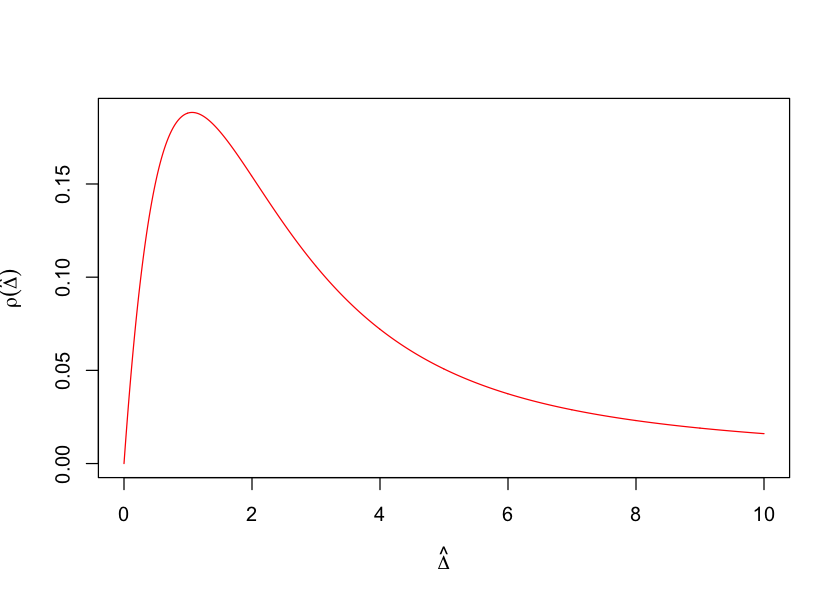

In [2]:
# Book shape plot
curve(rhovn(.5)(x),from=.0,to=10,col="red",xlab=expression(hat(Delta)),ylab=expression(rho(hat(Delta))),n=1000);

The red line is a plot of the order density $\rho(\hat \Delta)$ from HW2
corresponding to a Student-t rain distribution with 0.5 degrees of
freedom.

### Virtual price impact

In [3]:
# Cumulative order density computation
cumrho <- function(delhat,mu){
return(integrate(rhov(mu),lower = 0, upper = delhat)$value);
}

cumrhov <- function(delhat,mu){sapply(delhat,function(u){cumrho(u,mu)})}

# Compute vector
y <- (0:1000)/100;
x <- cumrhov(y,.5);

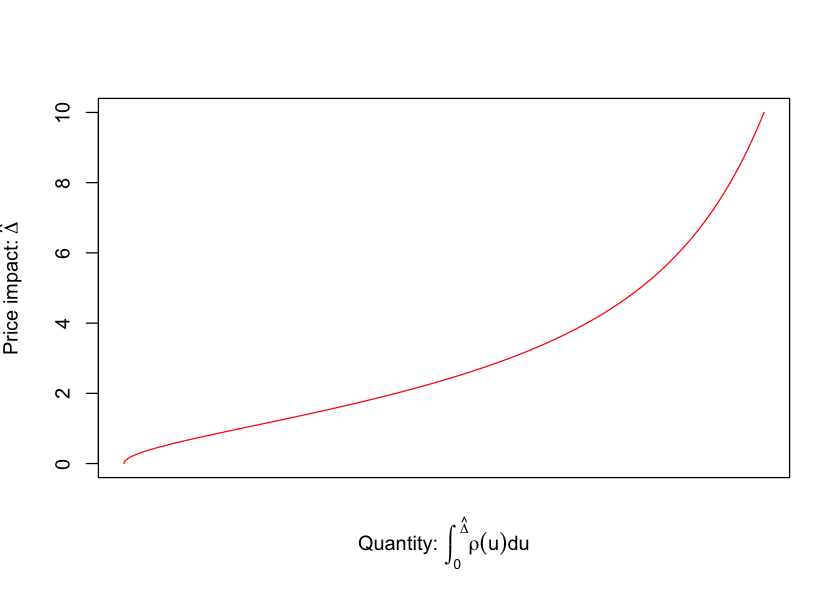

In [4]:
# Virtual impact plot
plot(x,y,col="red",type="l",ylab = expression(paste("Price impact: ",hat(Delta))),
xlab = expression(paste("Quantity: ",integral(rho(u)*du,0,hat(Delta)))),
xaxt="n"
)

### Impact for high trading rates

-   <span> You can’t trade more than the total depth of the book so
    price impact increases without limit as $n \rightarrow n_{max}$.
    </span>


-   <span>For a sufficiently large trading rate $v$, it can be shown
    that $$f(v) \sim \frac{1}{(1-v/v_{max})^{1/\mu}}$$</span>


-   <span> Setting $v = v_{max}\,(1-\epsilon)$ and taking the limit
    $\epsilon \to 0$,
    $$f(v) \sim \frac{1}{\epsilon^{1/\mu}} \textrm{ as } \epsilon \to 0.$$</span>


-   <span>Imagine we accumulate stock at a rate close to $v_{max}:=1$
    and liquidate at some (lower) rate $v$.</span>

    -   <span>This is the pump and dump strategy!</span>




-   Substituting into condition [(11)](#eq:fconstraint) gives
$$
\begin{eqnarray*}
&&\frac{1}{\epsilon^{1/\mu}} \, \left\{(1-\epsilon)\,{v}^{1-\gamma} -(1-\epsilon + v)^{2-\gamma}+{(1-\epsilon)}^{2-\gamma}+{v}^{2-\gamma}\right\} \\&&+ f\left(v\right)\,{(1-\epsilon)}^{2 - \gamma }
     \geq 0\end{eqnarray*}
$$

-  We observe that price manipulation is possible only if

    $$h(v,\,\gamma):={v}^{1-\gamma} -(1 + v)^{2-\gamma}+1+{v}^{2-\gamma} < 0.$$



### Graphical illustration

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Liquidity2008largev.png" align = "center" width=800></h2>

-   <span>We see from the picture that $h(v,\gamma)<0$ is equivalent to
    $$\gamma < \gamma^*:=2-\frac{\log 3}{\log 2}\approx 0.415$$ </span>

-   <span>So if $\gamma>\gamma^*$, there is no arbitrage.</span>

### More on high trading rates

-   <span>Also, $h(v,\,\gamma)$ decreases as $v \to v_{max}(=1)$ so the
    arbitrage is maximized near $v = v_{max}$.</span>

    -   <span>However, we already know that there is no arbitrage when
        trading in and out at the same rate.</span>


-   <span>A careful limiting argument nevertheless shows that arbitrage
    is still possible in principle for every $\gamma < \gamma^*$.
    </span>

-   We deduce that, *independent* of the particular exponent $\mu$ in
    the power law of limit order arrivals, the no-arbitrage condition
    is:


#### <font color="red"> Large size no arbitrage condition

<font color=red> $$\gamma > \gamma^* =2-\frac{\log 3}{\log 2}$$

### Summary

-   Assuming a price process of the form
    $$S_t=S_0+\int_0^t\,f(\dot{x}_s)\,G(t-s)\,ds+\int_0^t\,\sigma\,dZ_s$$  
    and imposing the principle of no price manipulation we showed that
    if the instantaneous market impact functions $f(\cdot)$ is
    nonlinear, the decay kernel $G(\cdot)$ must be singular at the
    origin.


-  In particular, if $f(v) \propto v^\delta$ and $G(\tau) \sim \tau^{-\gamma}$, we must have
    $$\gamma +\delta \geq 1.$$

-   <span> By considering the tails of the limit-order book, we deduce
    that
    $$\gamma \geq \gamma^* := 2- \frac{\log{3}}{\log{2}}\approx 0.415.$$
    </span>



-   <span>We then observe that if the average cost of a (not-too-large)
    VWAP execution is roughly independent of duration, the exponent
    $\delta$ of the power law of market impact should satisfy:
    $$\delta+\gamma \approx 1$$ </span>


-   <span>Finally, we note that empirical estimates are
    $\gamma \approx 0.4$ (Bouchaud et al.) and $\delta \approx 0.6$
    (Almgren et al.)</span>


-   <span>Our no price manipulation principle links these
    observations!</span>



### Schematic presentation of results

<h2><img src="https://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Liquidity2008summary.png" align = "center" width=700></h2>

### FGLW vs Bouchaud

-   The empirical findings of [Bershova and Rakhlin]<sup id="cite_ref-Bershova" class="reference"><a href="#cite_note-Bershova"><span>[</span>2<span>]</span></a></sup> suggest that the FGLW
    model is closer to reality than the Bouchaud model, thus
    invalidating [(4)](#eq:process) as a good model for the evolution of the stock price
    during execution of a metaorder.


-   However the FGLW model obviously violates the principle of no price
    manipulation.

    -   Assuming a power-law distribution of order sizes, permanent
        impact is also power-law and certainly nonlinear in the FGLW
        model.


-   More recent empirical work by [Waelbroeck and Gomes]<sup id="cite_ref-WaelbroeckGomes" class="reference"><a href="#cite_note-WaelbroeckGomes"><span>[</span>12<span>]</span></a></sup> suggests that only
    informed orders have permanent impact.

    -   This offers another potential way to eliminate price manipulation
        in the FGLW model.


-   [Donier and Bonart]<sup id="cite_ref-DonierBonart" class="reference"><a href="#cite_note-DonierBonart"><span>[</span>4<span>]</span></a></sup> argues convincingly that the market responds only to global order flow and not to individual metaorders.
    - Thus "informed" metaorders that are correlated with background order flow appear to generate permanent impact.
    - The Bouchaud picture is strongly preferred over the FGLW picture.  There is no "mechanical" permanent market impact.
    


### The LLOB model again

One very nice feature of the LLOB model is that price manipulation is excluded.  Specifically, recall that the expected impacted price $y_t$ is given by
<p>
$$
y_t = \frac 1 \cL\,\int_0^t\,\frac{m_s\,ds}{\sqrt{4\,\pi\,D\,(t-s)}}\,\exp\left\{- \frac{(y_t-y_s)^2}{4\,D\,(t-s)}  \right\}.
$$

The cost of liquidation is then given by
$$
\cC =  \frac 1 \cL\,\int_0^T\,dt\,m_t\,\int_0^t\,\frac{m_s\,ds}{\sqrt{4\,\pi\,D\,(t-s)}}\,\exp\left\{- \frac{(y_t-y_s)^2}{4\,D\,(t-s)}  \right\}.
$$
<p>
Changing the order of integration and then switching the labels $t$ and $s$ gives
<p>
$$
\cC =  \frac 1 \cL\,\int_0^T\,dt\, m_t\,\int_t^T \frac{m_s\,ds}{\sqrt{4\,\pi\,D\,(s-t)}}\,\exp\left\{- \frac{(y_s-y_t)^2}{4\,D\,(s-t)}  \right\}
$$
<p>
so the cost may be rewritten in the explicitly positive definite form
<p>
$$
\beas
\cC &=&  \frac 1 {2\,\cL}\,\int_0^T m_t\,dt\int_0^T m_s\,ds\frac{1}{\sqrt{4\,\pi\,D\,|t-s|}}\,\exp\left\{- \frac{(y_t-y_s)^2}{4\,D\,|t-s|}  \right\}\\
&\geq& 0.
\eeas
$$
<p>

### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-Almgren"><span class="mw-cite-backlink"><b><a href="#cite_ref-Almgren">^</a></b></span>Robert Almgren, Chee Thum, Emmanuel Hauptmann, and Hong Li, Equity
market impact, <span>*Risk*</span> July 2005, 57–62.
  </li>
  
  <li id="cite_note-BacryIuga"><span class="mw-cite-backlink"><b><a href="#cite_ref-BacryIuga">^</a></b></span>Emanuel Bacry, Adrian Iuga, Matthieu Lasnier, and Charles-Albert Lehalle, Market impacts and the life cycle of investors orders, *Market Microstructure and Liquidity* July 2005, 011550009 (2014).
  </li>
  
  <li id="cite_note-Bershova"><span class="mw-cite-backlink"><b><a href="#cite_ref-Bershova">^</a></b></span>Nataliya Bershova and Dmitry Rakhlin, The Non-Linear Market Impact of
Large Trades: Evidence from Buy-Side Order Flow, <span>*Quantitative
Finance*</span> <span>**13**</span>(11) 1759–1778 (2013).
  </li>
  
  <li id="cite_note-BMP"><span class="mw-cite-backlink"><b><a href="#cite_ref-BMP">^</a></b></span>Jean-Philippe Bouchaud, Marc Mézard and Marc Potters, Statistical
properties of stock order books: empirical results and models,
<span>*Quantitative Finance*</span> <span>**2**</span>(4) 251–256
(2002).
  </li>
  
  <li id="cite_note-DonierBonart"><span class="mw-cite-backlink"><b><a href="#cite_ref-DonierBonart">^</a></b></span>Jonathan Donier and Julius Bonart, A million metaorder analysis of market impact on the Bitcoin, <span>*Microstructure and Liquidity*</span> 1550008 (2014).
  </li>
  
  <li id="cite_note-LLOB"><span class="mw-cite-backlink"><b><a href="#cite_ref-LLOB">^</a></b></span>Jonathan Donier, Julius Bonart, Iacopo Mastromatteo, and Jean-Philippe Bouchaud, A fully consistent, minimal model for non-linear market impact, *Quantitative Finance* **15**(7) 1109-1121 (2015).
  </li>
  
  
  
  <li id="cite_note-FGLW"><span class="mw-cite-backlink"><b><a href="#cite_ref-FGLW">^</a></b></span>J Doyne Farmer, Austin Gerig, Fabrizio Lillo, and Henri Waelbroeck, How
efficiency shapes market impact, <span>*Quantitative
Finance*</span> <span>**13**</span>(11) 1743–1758 (2013).
  </li>
  
  <li id="cite_note-Gatheral"><span class="mw-cite-backlink"><b><a href="#cite_ref-Gatheral">^</a></b></span>Jim Gatheral, No-dynamic-arbitrage and market impact,
<span>*Quantitative Finance*</span> <span>**10**</span>(7) 749–759
(2010).
  </li>

  <li id="cite_note-GSS"><span class="mw-cite-backlink"><b><a href="#cite_ref-GSS">^</a></b></span>Jim Gatheral, Alexander Schied, and Alla Slynko, Exponential resilience
and decay of market impact, in <span>*Econophysics of Order-driven
Markets*</span>, Springer, 225–236, (2011).
  </li>
  
  
  <li id="cite_note-ObizhaevaWang"><span class="mw-cite-backlink"><b><a href="#cite_ref-ObizhaevaWang">^</a></b></span>Anna Obizhaeva and Jiang Wang, Optimal trading strategy and
supply/demand dynamics <span>*Journal of Financial Markets*</span>
<span>**16**</span>(1) 1–32 (2013).
  </li>
  
  
  <li id="cite_note-Toth"><span class="mw-cite-backlink"><b><a href="#cite_ref-Toth">^</a></b></span>Bence Tóth, Yves Lempérière, Cyril Deremble, Joachim de Lataillade,
Julien Kockelkoren, and Jean-Philippe Bouchaud, Anomalous price impact
and the critical nature of liquidity in financial markets,
<span>*Physical Review X*</span> 021006, 1-11(2011).
  </li>
  
  <li id="cite_note-WaelbroeckGomes"><span class="mw-cite-backlink"><b><a href="#cite_ref-WaelbroeckGomes">^</a></b></span>Henri Waelbroeck and Carla Gomes, Is Market Impact a Measure of the
Information Value of Trades? Market Response to Liquidity vs. Informed
Trades, <span>*Quantitative Finance*</span> <span>**15**</span>(5)
773-793 (2015). 
  </li>
  
  <li id="cite_note-ZTFL"><span class="mw-cite-backlink"><b><a href="#cite_ref-ZTFL">^</a></b></span>Elia Zarinelli, Michele Treccani, J. Doyne Farmer, and Fabrizio Lillo, Beyond the square
root: Evidence for logarithmic dependence of market impact on size and participation rate, *Market Microstructure and Liquidity* 1550004 (2015).
  </li>
  


</ol>